## Command to download all NCEP data from MetOffice

In [ ]:
%%bash
wget -r -np -k -A nc http://37.128.186.209/LAURA/NCEP-NCAR/   

In [15]:
iris.load_cube('/home/jovyan/data/mon.air.2m.gauss.1980.nc')

<iris 'Cube' of mean Daily Air temperature at 2 m / (degK) (time: 12; latitude: 94; longitude: 192)>

mean Daily Air temperature at 2 m / (degK) (latitude: 94; longitude: 192)
     Dimension coordinates:
          latitude                                  x              -
          longitude                                 -              x
     Scalar coordinates:
          time: 2015-02-14 12:00:00, bound=(2015-02-01 00:00:00, 2015-02-28 00:00:00)
     Attributes:
          CDI: Climate Data Interface version 1.9.8 (https://mpimet.mpg.de/cdi)
          CDO: Climate Data Operators version 1.9.8 (https://mpimet.mpg.de/cdo)
          Conventions: COARDS
          GRIB_id: 11
          GRIB_name: TMP
          References: http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis.html
          actual_range: [178.325 317.475]
          dataset: NCEP Reanalysis Daily Averages
          dataset_title: NCEP-NCAR Reanalysis 1
          description: Data is from NMC initialized reanalysis
(4x/day).  It consists of T62 variables...
          frequency: mon
          history: Mon Nov 02 15:30:16 

/opt/conda/lib/python3.8/site-packages/iris/coords.py:1192: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn('Coordinate {!r} is not bounded, guessing '
/opt/conda/lib/python3.8/site-packages/iris/coords.py:1192: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn('Coordinate {!r} is not bounded, guessing '


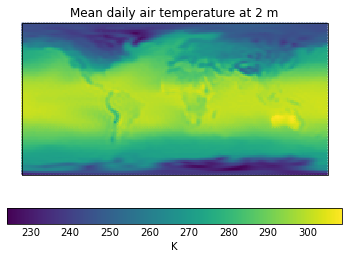

In [122]:
import iris
from __future__ import (absolute_import, division, print_function)
from six.moves import (filter, input, map, range, zip)  # noqa
import matplotlib.pyplot as plt

import iris
import iris.quickplot as qplt

cube_2015 = iris.load('/home/jovyan/data/mon.air.2m.gauss.2015.nc')[0]

print(cube_2015[1])

qplt.pcolormesh(cube_2015[1])

plt.show()

## Code to fix monthly NCEP data from 2015 to 2020

Do the same for all the data from 2015 to 2020

In [203]:
cube_list = iris.load('/home/jovyan/data/mon.air.2m.gauss.2020.nc')
cube_list_new = iris.cube.CubeList([cube_list[0]])
iris.fileformats.netcdf.save(cube_list_new, '/home/jovyan/data/mon.air.2m.gauss.2020.new.nc')

To load all cubes in a specific folder

In [232]:
from pathlib import Path
import iris

paths = Path('/home/jovyan/data/').glob('*.nc')
filenames = [str(path) for path in paths]
cubes = iris.load(filenames)


In [205]:
for i, fn in enumerate(filenames):
    print(f'{i}: {fn}') 

0: /home/jovyan/data/mon.air.2m.gauss.1980.nc
1: /home/jovyan/data/mon.air.2m.gauss.1981.nc
2: /home/jovyan/data/mon.air.2m.gauss.1982.nc
3: /home/jovyan/data/mon.air.2m.gauss.1983.nc
4: /home/jovyan/data/mon.air.2m.gauss.1984.nc
5: /home/jovyan/data/mon.air.2m.gauss.1985.nc
6: /home/jovyan/data/mon.air.2m.gauss.1986.nc
7: /home/jovyan/data/mon.air.2m.gauss.1987.nc
8: /home/jovyan/data/mon.air.2m.gauss.1988.nc
9: /home/jovyan/data/mon.air.2m.gauss.1989.nc
10: /home/jovyan/data/mon.air.2m.gauss.1990.nc
11: /home/jovyan/data/mon.air.2m.gauss.1991.nc
12: /home/jovyan/data/mon.air.2m.gauss.1992.nc
13: /home/jovyan/data/mon.air.2m.gauss.1993.nc
14: /home/jovyan/data/mon.air.2m.gauss.1994.nc
15: /home/jovyan/data/mon.air.2m.gauss.1995.nc
16: /home/jovyan/data/mon.air.2m.gauss.1996.nc
17: /home/jovyan/data/mon.air.2m.gauss.1997.nc
18: /home/jovyan/data/mon.air.2m.gauss.1998.nc
19: /home/jovyan/data/mon.air.2m.gauss.1999.nc
20: /home/jovyan/data/mon.air.2m.gauss.2000.nc
21: /home/jovyan/data/m

Code to concatenate monthly NCEP data

In [244]:
from iris.experimental.equalise_cubes import equalise_attributes
equalise_attributes(cubes)
concatenated_cubes = cubes.concatenate_cube()
concatenated_cubes

<iris 'Cube' of mean Daily Air temperature at 2 m / (degK) (time: 490; latitude: 94; longitude: 192)>

In [248]:
iris.fileformats.netcdf.save(concatenated_cubes, '/home/jovyan/data/mon.air.2m.gauss.concatenated.nc')

In [247]:
print(concatenated_cubes.coord('time'))

DimCoord([1980-01-16 00:00:00, 1980-02-15 00:00:00, 1980-03-16 00:00:00,
       1980-04-15 12:00:00, 1980-05-16 00:00:00, 1980-06-15 12:00:00,
       1980-07-16 00:00:00, 1980-08-16 00:00:00, 1980-09-15 12:00:00,
       1980-10-16 00:00:00, 1980-11-15 12:00:00, 1980-12-16 00:00:00,
       1981-01-16 00:00:00, 1981-02-14 12:00:00, 1981-03-16 00:00:00,
       1981-04-15 12:00:00, 1981-05-16 00:00:00, 1981-06-15 12:00:00,
       1981-07-16 00:00:00, 1981-08-16 00:00:00, 1981-09-15 12:00:00,
       1981-10-16 00:00:00, 1981-11-15 12:00:00, 1981-12-16 00:00:00,
       1982-01-16 00:00:00, 1982-02-14 12:00:00, 1982-03-16 00:00:00,
       1982-04-15 12:00:00, 1982-05-16 00:00:00, 1982-06-15 12:00:00,
       1982-07-16 00:00:00, 1982-08-16 00:00:00, 1982-09-15 12:00:00,
       1982-10-16 00:00:00, 1982-11-15 12:00:00, 1982-12-16 00:00:00,
       1983-01-16 00:00:00, 1983-02-14 12:00:00, 1983-03-16 00:00:00,
       1983-04-15 12:00:00, 1983-05-16 00:00:00, 1983-06-15 12:00:00,
       1983-07-16